正在加载数据...
数据加载成功！共 25827 行, 26 列

数据探索分析

1. 数据基本信息:
   - 数据维度: (25827, 26)
   - 内存使用: 17.62 MB

2. 列名及数据类型:
game_id                      object
record_id                    object
home_team                    object
away_team                    object
went_ot                       int64
home_off_line                object
home_def_pairing             object
away_off_line                object
away_def_pairing             object
home_goalie                  object
away_goalie                  object
toi                         float64
home_assists                  int64
home_shots                    int64
home_xg                     float64
home_max_xg                 float64
home_goals                    int64
away_assists                  int64
away_shots                    int64
away_xg                     float64
away_max_xg                 float64
away_goals                    int64
home_penalties_committed      int64
home_penalty_minutes          int64
away_penalties_committed   

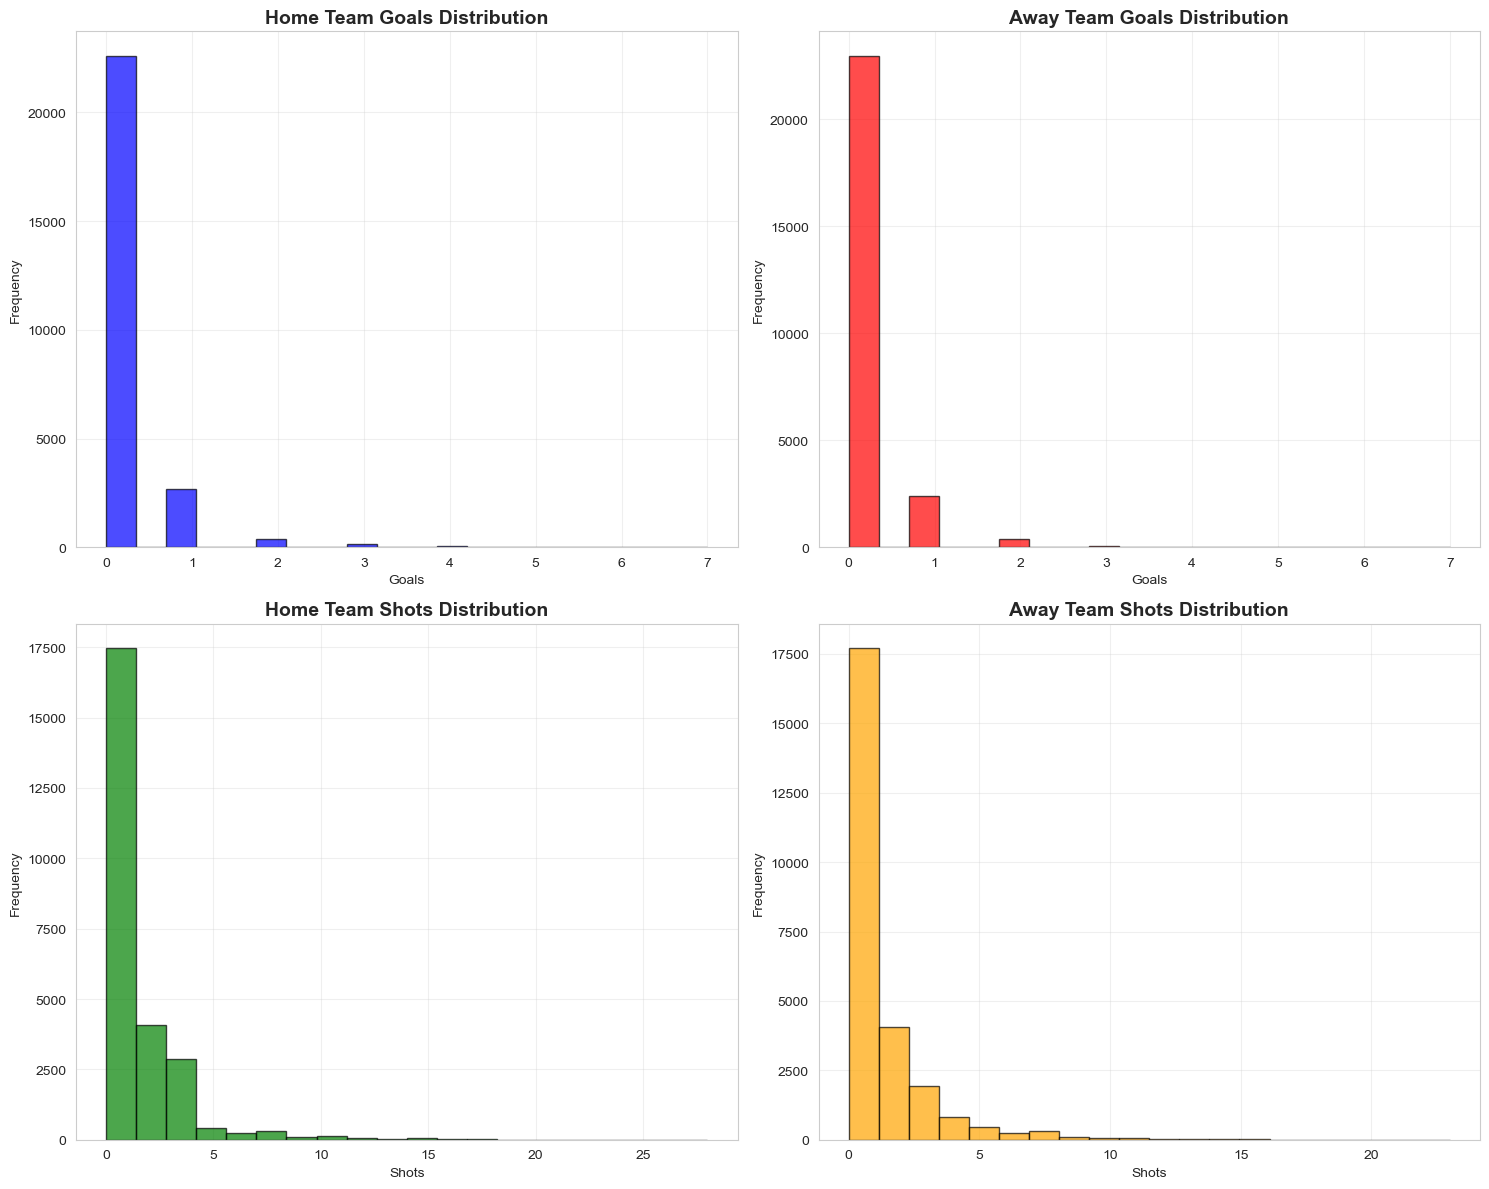


[图表 2/7] 射门数 vs 进球数


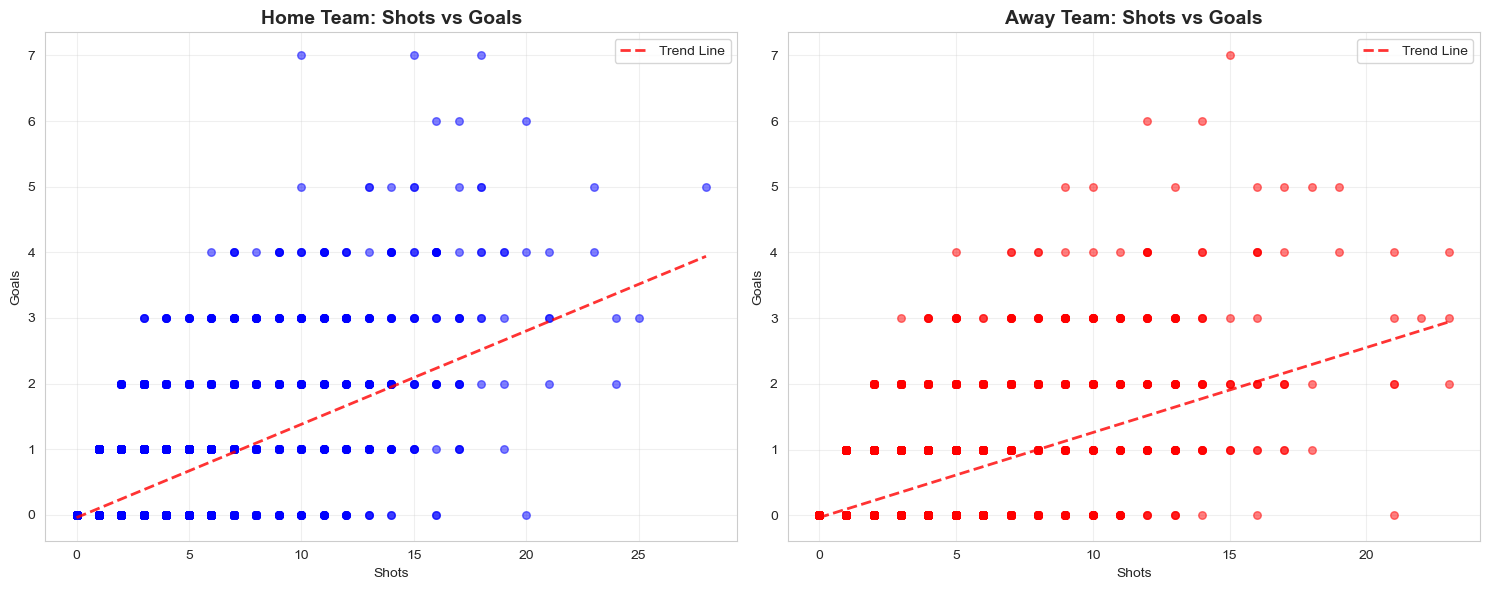


[图表 3/7] xG分析


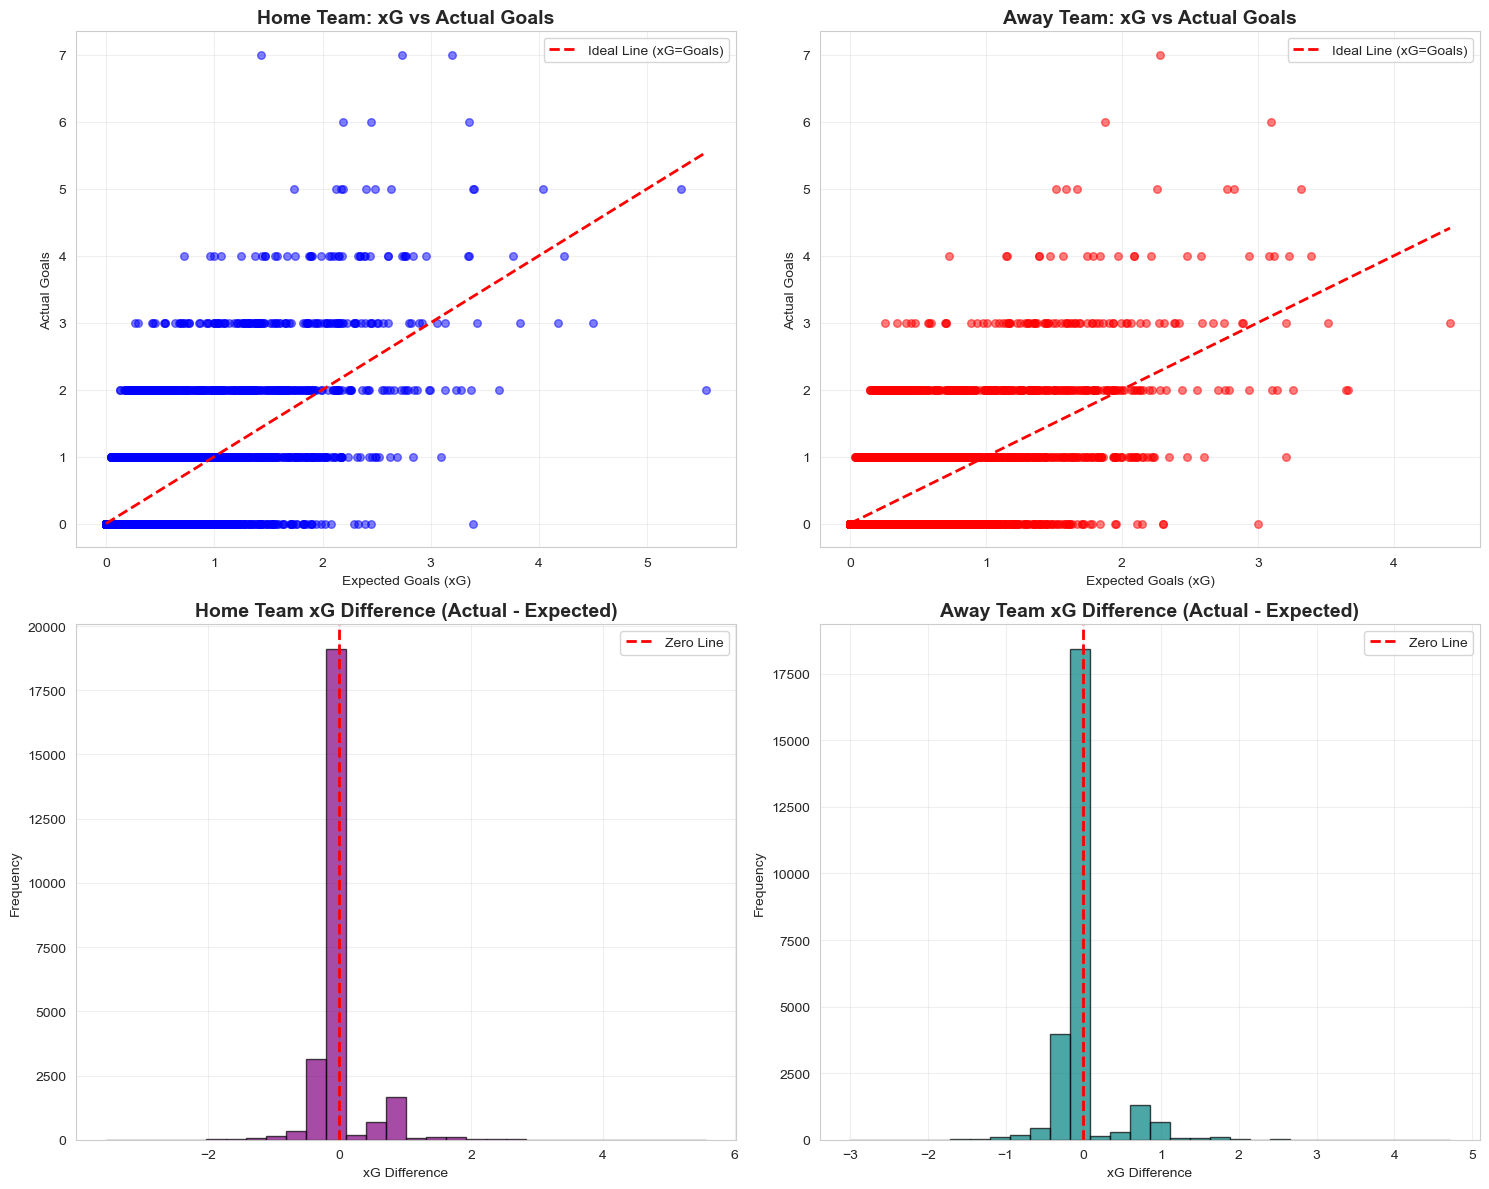


[图表 4/7] 球队排名


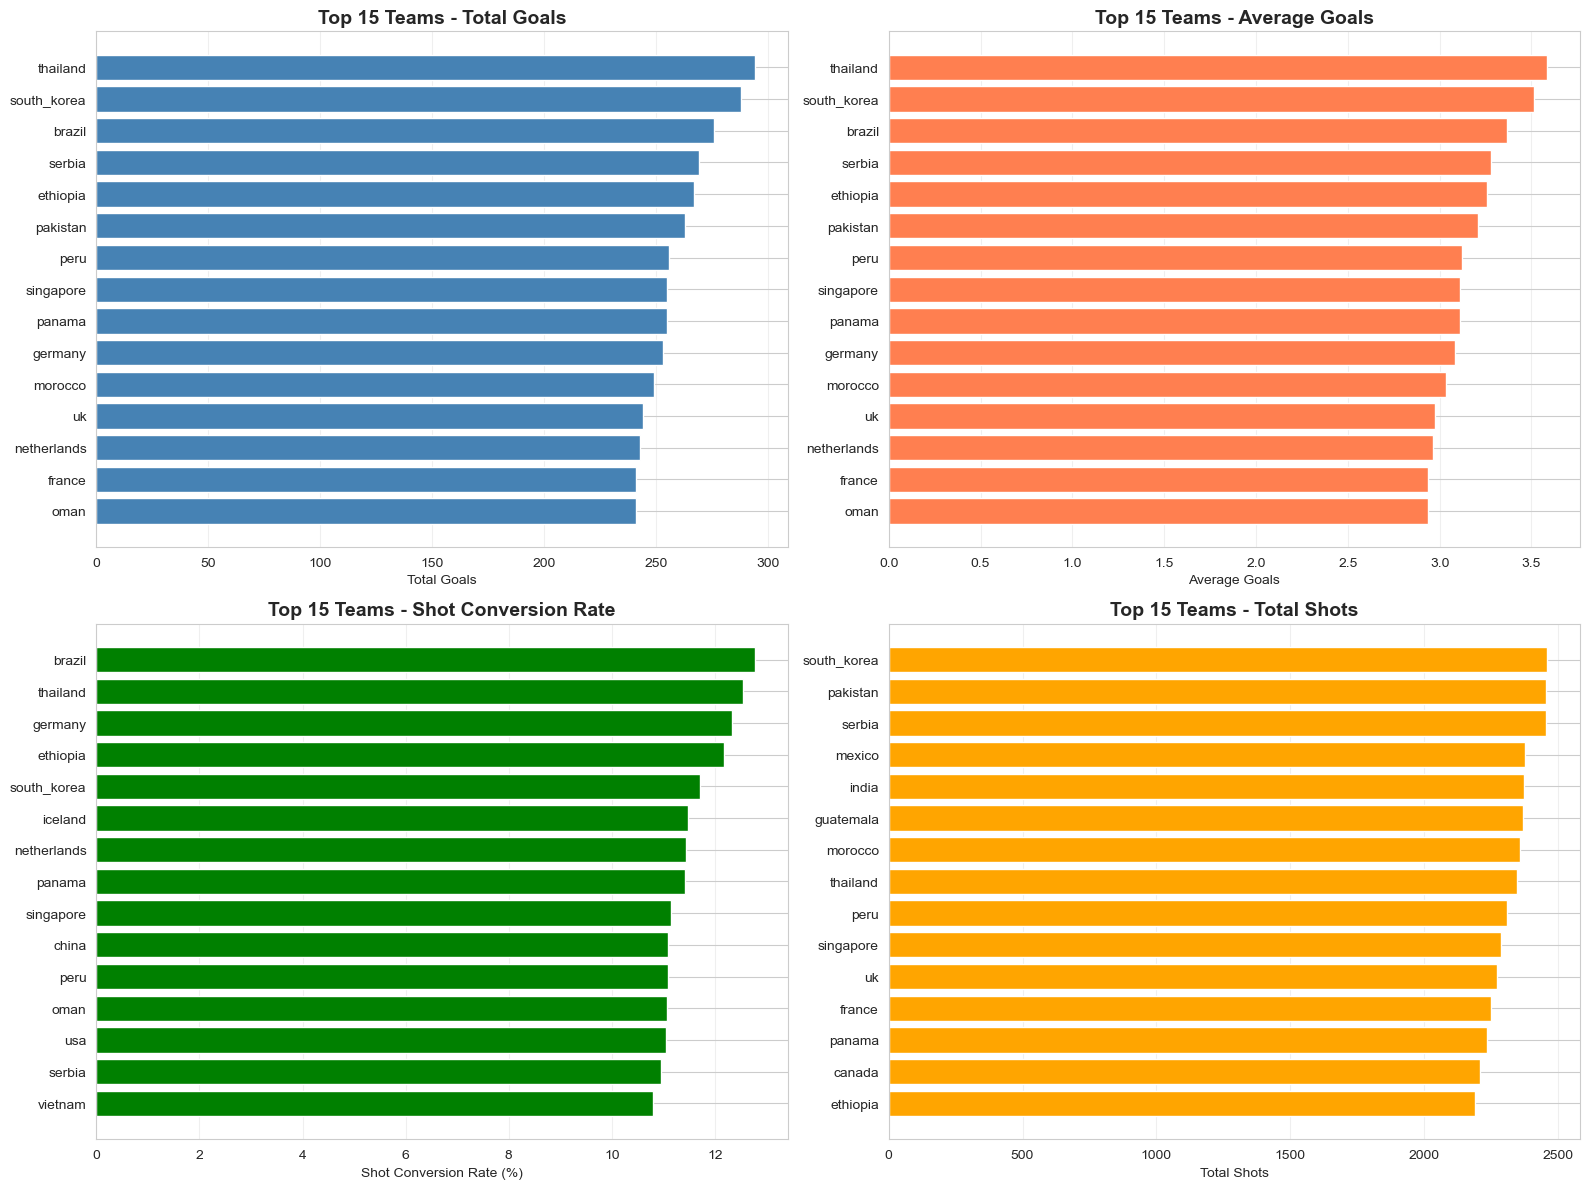


[图表 5/7] 犯规分析


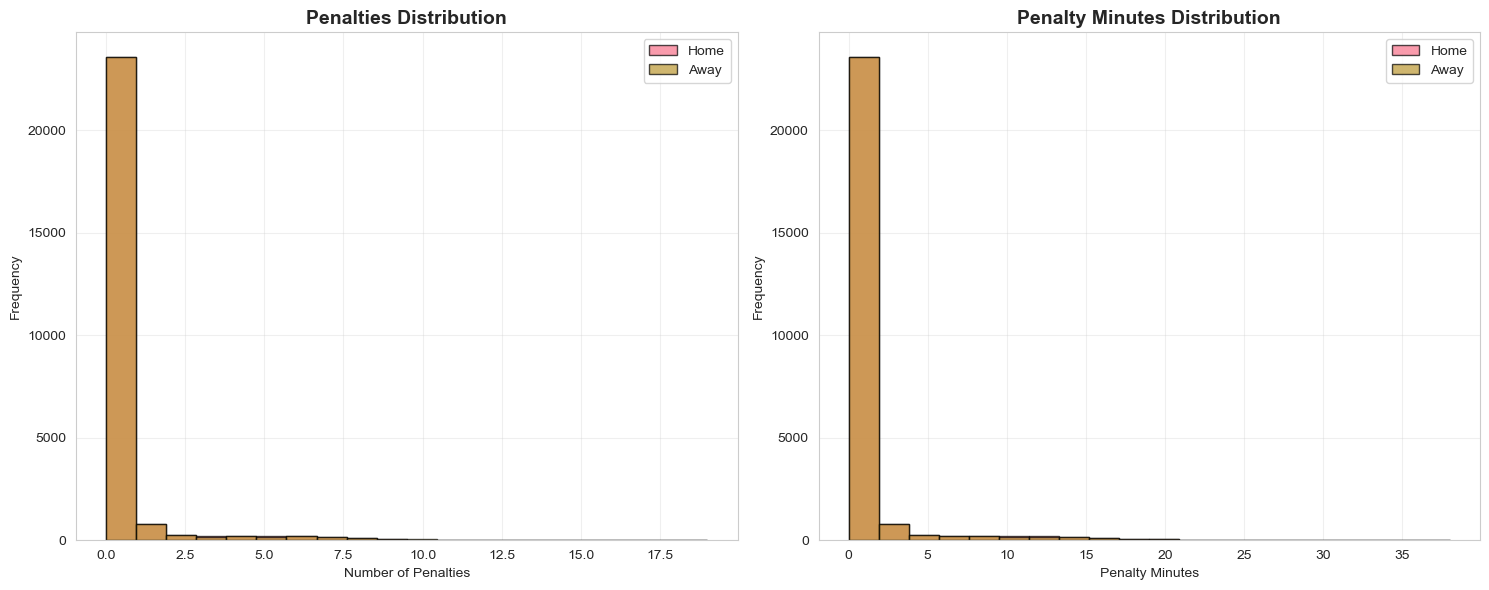


[图表 6/7] 特征相关性热力图


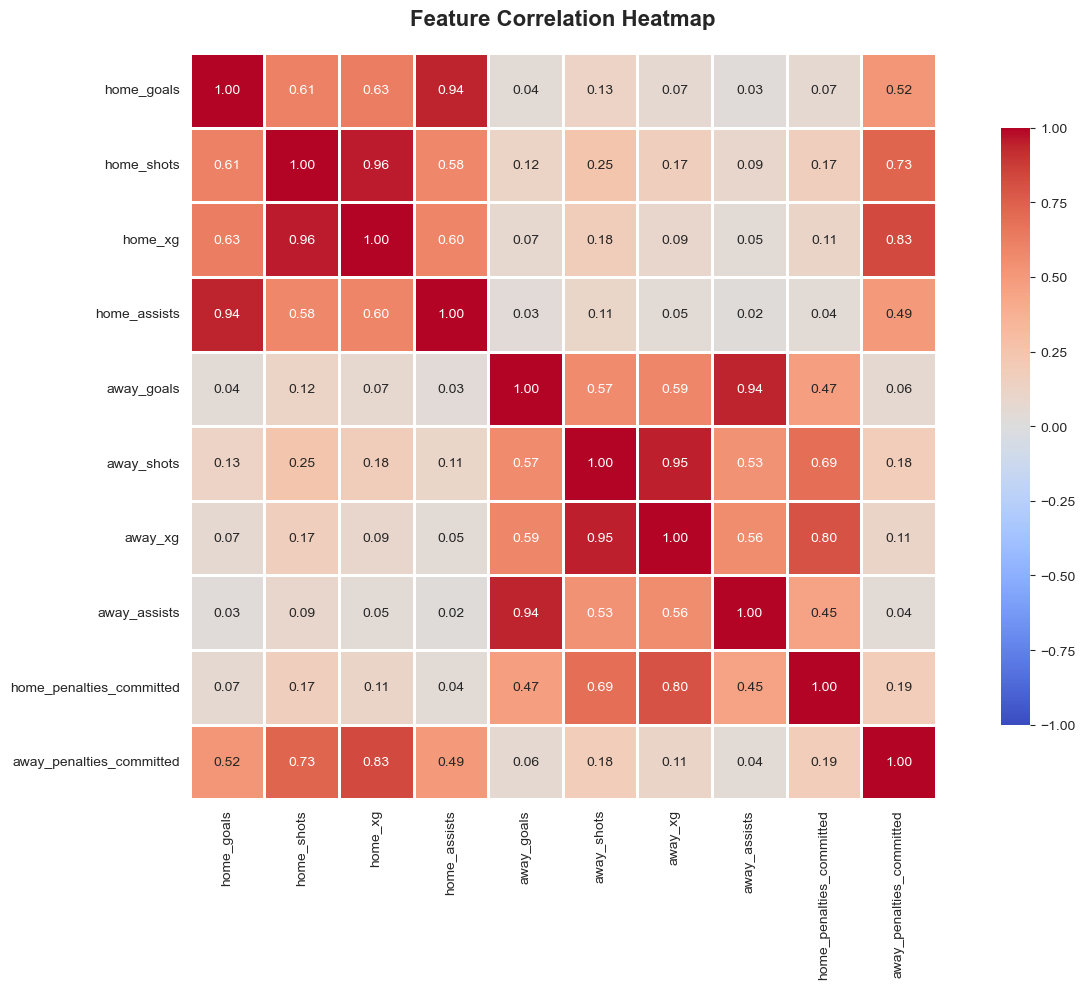


[图表 7/7] 加时赛分析


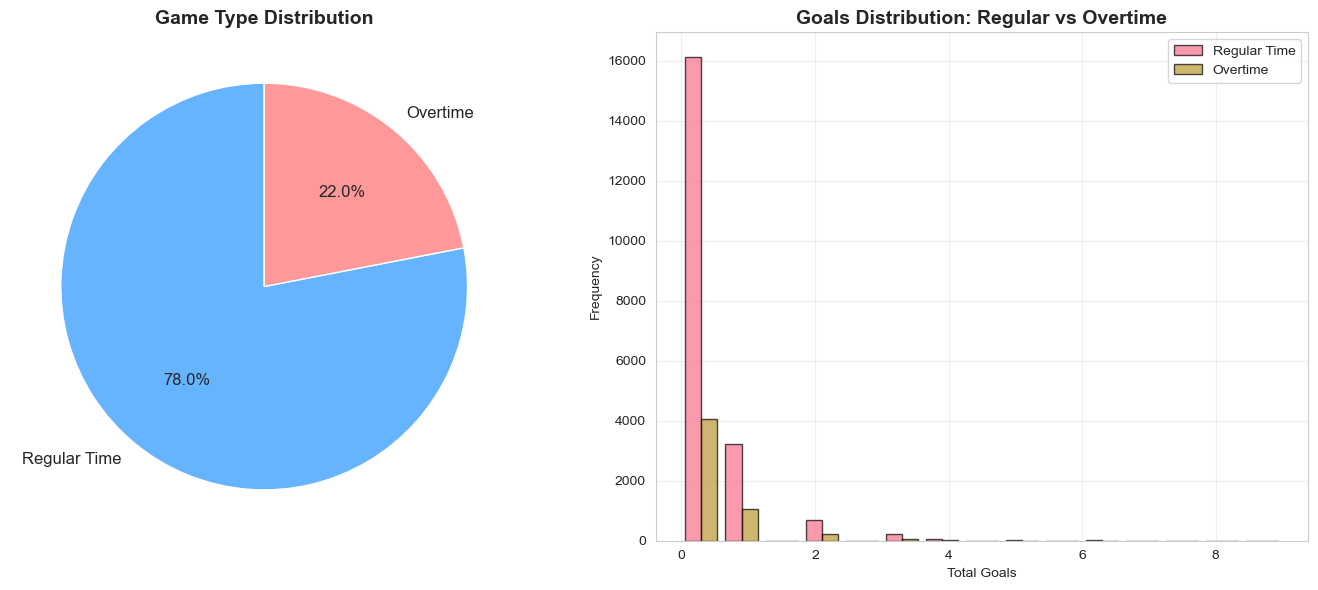


所有图表已显示完成

保存清洗后的数据...
✓ 数据已保存到: whl_2025_cleaned.csv

数据分析总结报告

【数据概览】
  总记录数: 25,827
  比赛场次: 1,312
  参赛球队数: 32

【进球统计】
  主队总进球: 4,056
  客队总进球: 3,498
  平均每场进球: 0.29
  单场最高进球: 9

【射门统计】
  主队总射门: 36,164
  客队总射门: 34,327
  平均每场射门: 2.73
  整体射门转化率: 10.72%

【xG分析】
  主队总xG: 4105.27
  客队总xG: 3688.13
  主队xG表现: -0.002
  客队xG表现: -0.007

【犯规统计】
  主队总犯规: 8,174
  客队总犯规: 8,908
  主队总犯规分钟: 16,697
  客队总犯规分钟: 18,172

【比赛类型】
  常规时间结束: 1,024 场 (78.0%)
  进入加时赛: 288 场 (22.0%)

【TOP 5 球队】

进球榜:
  1. thailand: 294 球 (场均 3.59)
  2. south_korea: 288 球 (场均 3.51)
  3. brazil: 276 球 (场均 3.37)
  4. serbia: 269 球 (场均 3.28)
  5. ethiopia: 267 球 (场均 3.26)

射门转化率榜:
  1. brazil: 12.77%
  2. thailand: 12.53%
  3. germany: 12.33%
  4. ethiopia: 12.18%
  5. south_korea: 11.71%

分析完成！

✓ 所有分析任务已完成！

生成的文件:
  1. whl_2025_cleaned.csv - 清洗后的数据
  2. 所有图表已在Jupyter Notebook中显示


In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
WHL 2025 数据预处理和可视化分析 - Jupyter Notebook版本
Hockey Game Statistics Analysis
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 设置绘图风格
sns.set_style("whitegrid")
sns.set_palette("husl")

# Jupyter Notebook中显示图表
%matplotlib inline

class HockeyDataAnalyzer:
    """冰球数据分析器"""
    
    def __init__(self, filepath):
        """初始化分析器"""
        self.filepath = filepath
        self.df = None
        self.df_cleaned = None
        
    def load_data(self):
        """加载数据"""
        print("=" * 60)
        print("正在加载数据...")
        self.df = pd.read_csv(self.filepath)
        print(f"数据加载成功！共 {len(self.df)} 行, {len(self.df.columns)} 列")
        print("=" * 60)
        return self
    
    def explore_data(self):
        """数据探索"""
        print("\n" + "=" * 60)
        print("数据探索分析")
        print("=" * 60)
        
        print("\n1. 数据基本信息:")
        print(f"   - 数据维度: {self.df.shape}")
        print(f"   - 内存使用: {self.df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
        
        print("\n2. 列名及数据类型:")
        print(self.df.dtypes)
        
        print("\n3. 数据前5行:")
        print(self.df.head())
        
        print("\n4. 数据统计描述:")
        print(self.df.describe())
        
        print("\n5. 缺失值统计:")
        missing = self.df.isnull().sum()
        if missing.sum() == 0:
            print("   无缺失值")
        else:
            print(missing[missing > 0])
        
        print("\n6. 唯一值统计:")
        print(f"   - 唯一比赛数: {self.df['game_id'].nunique()}")
        print(f"   - 唯一主队数: {self.df['home_team'].nunique()}")
        print(f"   - 唯一客队数: {self.df['away_team'].nunique()}")
        print(f"   - 加时赛比例: {self.df['went_ot'].mean()*100:.2f}%")
        
        return self
    
    def preprocess_data(self):
        """数据预处理"""
        print("\n" + "=" * 60)
        print("数据预处理")
        print("=" * 60)
        
        self.df_cleaned = self.df.copy()
        
        # 1. 处理缺失值
        print("\n1. 处理缺失值...")
        initial_rows = len(self.df_cleaned)
        self.df_cleaned = self.df_cleaned.dropna()
        print(f"   删除了 {initial_rows - len(self.df_cleaned)} 行包含缺失值的数据")
        
        # 2. 去除重复值
        print("\n2. 去除重复值...")
        initial_rows = len(self.df_cleaned)
        self.df_cleaned = self.df_cleaned.drop_duplicates()
        print(f"   删除了 {initial_rows - len(self.df_cleaned)} 行重复数据")
        
        # 3. 数据类型转换
        print("\n3. 数据类型转换...")
        # 确保数值列为正确的数据类型
        numeric_columns = ['toi', 'home_assists', 'home_shots', 'home_xg', 'home_max_xg', 
                          'home_goals', 'away_assists', 'away_shots', 'away_xg', 
                          'away_max_xg', 'away_goals', 'home_penalties_committed',
                          'home_penalty_minutes', 'away_penalties_committed', 'away_penalty_minutes']
        
        for col in numeric_columns:
            self.df_cleaned[col] = pd.to_numeric(self.df_cleaned[col], errors='coerce')
        
        print(f"   转换了 {len(numeric_columns)} 个数值列")
        
        # 4. 创建衍生特征
        print("\n4. 创建衍生特征...")
        
        # 射门转化率
        self.df_cleaned['home_shot_conversion'] = np.where(
            self.df_cleaned['home_shots'] > 0,
            self.df_cleaned['home_goals'] / self.df_cleaned['home_shots'],
            0
        )
        
        self.df_cleaned['away_shot_conversion'] = np.where(
            self.df_cleaned['away_shots'] > 0,
            self.df_cleaned['away_goals'] / self.df_cleaned['away_shots'],
            0
        )
        
        # xG差异（实际进球与预期进球的差异）
        self.df_cleaned['home_xg_diff'] = self.df_cleaned['home_goals'] - self.df_cleaned['home_xg']
        self.df_cleaned['away_xg_diff'] = self.df_cleaned['away_goals'] - self.df_cleaned['away_xg']
        
        # 总进球数
        self.df_cleaned['total_goals'] = self.df_cleaned['home_goals'] + self.df_cleaned['away_goals']
        
        # 射门总数
        self.df_cleaned['total_shots'] = self.df_cleaned['home_shots'] + self.df_cleaned['away_shots']
        
        print("   创建了以下衍生特征:")
        print("   - home_shot_conversion: 主队射门转化率")
        print("   - away_shot_conversion: 客队射门转化率")
        print("   - home_xg_diff: 主队xG差异")
        print("   - away_xg_diff: 客队xG差异")
        print("   - total_goals: 总进球数")
        print("   - total_shots: 总射门数")
        
        # 5. 异常值检测
        print("\n5. 异常值检测...")
        outlier_columns = ['home_goals', 'away_goals', 'home_shots', 'away_shots']
        for col in outlier_columns:
            Q1 = self.df_cleaned[col].quantile(0.25)
            Q3 = self.df_cleaned[col].quantile(0.75)
            IQR = Q3 - Q1
            outliers = ((self.df_cleaned[col] < (Q1 - 1.5 * IQR)) | 
                       (self.df_cleaned[col] > (Q3 + 1.5 * IQR))).sum()
            print(f"   {col}: {outliers} 个异常值")
        
        print("\n数据预处理完成！")
        print(f"清洗后数据: {len(self.df_cleaned)} 行, {len(self.df_cleaned.columns)} 列")
        
        return self
    
    def aggregate_team_stats(self):
        """聚合球队统计数据"""
        print("\n" + "=" * 60)
        print("聚合球队统计数据")
        print("=" * 60)
        
        # 主队统计
        home_stats = self.df_cleaned.groupby('home_team').agg({
            'home_goals': 'sum',
            'home_shots': 'sum',
            'home_xg': 'sum',
            'home_assists': 'sum',
            'home_penalties_committed': 'sum',
            'game_id': 'nunique'
        }).rename(columns={'game_id': 'games_played'})
        
        # 客队统计
        away_stats = self.df_cleaned.groupby('away_team').agg({
            'away_goals': 'sum',
            'away_shots': 'sum',
            'away_xg': 'sum',
            'away_assists': 'sum',
            'away_penalties_committed': 'sum',
            'game_id': 'nunique'
        }).rename(columns={'game_id': 'games_played'})
        
        # 合并统计（使用主队和客队名称统一）
        teams = list(set(self.df_cleaned['home_team'].unique()) | 
                    set(self.df_cleaned['away_team'].unique()))
        
        team_stats = pd.DataFrame(index=teams)
        
        for team in teams:
            home_data = home_stats.loc[team] if team in home_stats.index else pd.Series(0, index=home_stats.columns)
            away_data = away_stats.loc[team] if team in away_stats.index else pd.Series(0, index=away_stats.columns)
            
            team_stats.loc[team, 'total_goals'] = home_data['home_goals'] + away_data['away_goals']
            team_stats.loc[team, 'total_shots'] = home_data['home_shots'] + away_data['away_shots']
            team_stats.loc[team, 'total_xg'] = home_data['home_xg'] + away_data['away_xg']
            team_stats.loc[team, 'total_assists'] = home_data['home_assists'] + away_data['away_assists']
            team_stats.loc[team, 'total_penalties'] = (home_data['home_penalties_committed'] + 
                                                       away_data['away_penalties_committed'])
            team_stats.loc[team, 'games'] = home_data['games_played'] + away_data['games_played']
        
        # 计算平均值
        team_stats['avg_goals'] = team_stats['total_goals'] / team_stats['games']
        team_stats['avg_shots'] = team_stats['total_shots'] / team_stats['games']
        team_stats['avg_xg'] = team_stats['total_xg'] / team_stats['games']
        team_stats['shot_accuracy'] = team_stats['total_goals'] / team_stats['total_shots']
        
        self.team_stats = team_stats.sort_values('total_goals', ascending=False)
        
        print("\n前10名球队统计:")
        print(self.team_stats.head(10)[['total_goals', 'total_shots', 'total_xg', 
                                         'avg_goals', 'shot_accuracy']])
        
        return self
    
    def visualize_data(self):
        """数据可视化"""
        print("\n" + "=" * 60)
        print("生成数据可视化图表...")
        print("=" * 60)
        
        # 1. 进球分布直方图
        print("\n[图表 1/7] 进球和射门分布")
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        axes[0, 0].hist(self.df_cleaned['home_goals'], bins=20, alpha=0.7, color='blue', edgecolor='black')
        axes[0, 0].set_title('Home Team Goals Distribution', fontsize=14, fontweight='bold')
        axes[0, 0].set_xlabel('Goals')
        axes[0, 0].set_ylabel('Frequency')
        axes[0, 0].grid(alpha=0.3)
        
        axes[0, 1].hist(self.df_cleaned['away_goals'], bins=20, alpha=0.7, color='red', edgecolor='black')
        axes[0, 1].set_title('Away Team Goals Distribution', fontsize=14, fontweight='bold')
        axes[0, 1].set_xlabel('Goals')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].grid(alpha=0.3)
        
        # 2. 射门数分布
        axes[1, 0].hist(self.df_cleaned['home_shots'], bins=20, alpha=0.7, color='green', edgecolor='black')
        axes[1, 0].set_title('Home Team Shots Distribution', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Shots')
        axes[1, 0].set_ylabel('Frequency')
        axes[1, 0].grid(alpha=0.3)
        
        axes[1, 1].hist(self.df_cleaned['away_shots'], bins=20, alpha=0.7, color='orange', edgecolor='black')
        axes[1, 1].set_title('Away Team Shots Distribution', fontsize=14, fontweight='bold')
        axes[1, 1].set_xlabel('Shots')
        axes[1, 1].set_ylabel('Frequency')
        axes[1, 1].grid(alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # 3. 进球与射门的关系散点图
        print("\n[图表 2/7] 射门数 vs 进球数")
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        axes[0].scatter(self.df_cleaned['home_shots'], self.df_cleaned['home_goals'], 
                       alpha=0.5, c='blue', s=30)
        axes[0].set_title('Home Team: Shots vs Goals', fontsize=14, fontweight='bold')
        axes[0].set_xlabel('Shots')
        axes[0].set_ylabel('Goals')
        axes[0].grid(alpha=0.3)
        
        # 添加趋势线
        z = np.polyfit(self.df_cleaned['home_shots'], self.df_cleaned['home_goals'], 1)
        p = np.poly1d(z)
        axes[0].plot(self.df_cleaned['home_shots'].sort_values(), 
                    p(self.df_cleaned['home_shots'].sort_values()), 
                    "r--", alpha=0.8, linewidth=2, label='Trend Line')
        axes[0].legend()
        
        axes[1].scatter(self.df_cleaned['away_shots'], self.df_cleaned['away_goals'], 
                       alpha=0.5, c='red', s=30)
        axes[1].set_title('Away Team: Shots vs Goals', fontsize=14, fontweight='bold')
        axes[1].set_xlabel('Shots')
        axes[1].set_ylabel('Goals')
        axes[1].grid(alpha=0.3)
        
        z = np.polyfit(self.df_cleaned['away_shots'], self.df_cleaned['away_goals'], 1)
        p = np.poly1d(z)
        axes[1].plot(self.df_cleaned['away_shots'].sort_values(), 
                    p(self.df_cleaned['away_shots'].sort_values()), 
                    "r--", alpha=0.8, linewidth=2, label='Trend Line')
        axes[1].legend()
        
        plt.tight_layout()
        plt.show()
        
        # 4. xG (Expected Goals) 分析
        print("\n[图表 3/7] xG分析")
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # xG vs 实际进球
        axes[0, 0].scatter(self.df_cleaned['home_xg'], self.df_cleaned['home_goals'], 
                          alpha=0.5, c='blue', s=30)
        axes[0, 0].plot([0, self.df_cleaned['home_xg'].max()], 
                       [0, self.df_cleaned['home_xg'].max()], 
                       'r--', linewidth=2, label='Ideal Line (xG=Goals)')
        axes[0, 0].set_title('Home Team: xG vs Actual Goals', fontsize=14, fontweight='bold')
        axes[0, 0].set_xlabel('Expected Goals (xG)')
        axes[0, 0].set_ylabel('Actual Goals')
        axes[0, 0].legend()
        axes[0, 0].grid(alpha=0.3)
        
        axes[0, 1].scatter(self.df_cleaned['away_xg'], self.df_cleaned['away_goals'], 
                          alpha=0.5, c='red', s=30)
        axes[0, 1].plot([0, self.df_cleaned['away_xg'].max()], 
                       [0, self.df_cleaned['away_xg'].max()], 
                       'r--', linewidth=2, label='Ideal Line (xG=Goals)')
        axes[0, 1].set_title('Away Team: xG vs Actual Goals', fontsize=14, fontweight='bold')
        axes[0, 1].set_xlabel('Expected Goals (xG)')
        axes[0, 1].set_ylabel('Actual Goals')
        axes[0, 1].legend()
        axes[0, 1].grid(alpha=0.3)
        
        # xG 差异分布
        axes[1, 0].hist(self.df_cleaned['home_xg_diff'], bins=30, alpha=0.7, 
                       color='purple', edgecolor='black')
        axes[1, 0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Line')
        axes[1, 0].set_title('Home Team xG Difference (Actual - Expected)', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('xG Difference')
        axes[1, 0].set_ylabel('Frequency')
        axes[1, 0].legend()
        axes[1, 0].grid(alpha=0.3)
        
        axes[1, 1].hist(self.df_cleaned['away_xg_diff'], bins=30, alpha=0.7, 
                       color='teal', edgecolor='black')
        axes[1, 1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Line')
        axes[1, 1].set_title('Away Team xG Difference (Actual - Expected)', fontsize=14, fontweight='bold')
        axes[1, 1].set_xlabel('xG Difference')
        axes[1, 1].set_ylabel('Frequency')
        axes[1, 1].legend()
        axes[1, 1].grid(alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # 5. 球队统计排名
        print("\n[图表 4/7] 球队排名")
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Top 15 球队总进球
        top_teams = self.team_stats.nlargest(15, 'total_goals')
        axes[0, 0].barh(range(len(top_teams)), top_teams['total_goals'], color='steelblue')
        axes[0, 0].set_yticks(range(len(top_teams)))
        axes[0, 0].set_yticklabels(top_teams.index)
        axes[0, 0].set_xlabel('Total Goals')
        axes[0, 0].set_title('Top 15 Teams - Total Goals', fontsize=14, fontweight='bold')
        axes[0, 0].grid(axis='x', alpha=0.3)
        axes[0, 0].invert_yaxis()
        
        # Top 15 球队平均进球
        top_avg = self.team_stats.nlargest(15, 'avg_goals')
        axes[0, 1].barh(range(len(top_avg)), top_avg['avg_goals'], color='coral')
        axes[0, 1].set_yticks(range(len(top_avg)))
        axes[0, 1].set_yticklabels(top_avg.index)
        axes[0, 1].set_xlabel('Average Goals')
        axes[0, 1].set_title('Top 15 Teams - Average Goals', fontsize=14, fontweight='bold')
        axes[0, 1].grid(axis='x', alpha=0.3)
        axes[0, 1].invert_yaxis()
        
        # Top 15 球队射门转化率
        top_accuracy = self.team_stats.nlargest(15, 'shot_accuracy')
        axes[1, 0].barh(range(len(top_accuracy)), top_accuracy['shot_accuracy']*100, 
                       color='green')
        axes[1, 0].set_yticks(range(len(top_accuracy)))
        axes[1, 0].set_yticklabels(top_accuracy.index)
        axes[1, 0].set_xlabel('Shot Conversion Rate (%)')
        axes[1, 0].set_title('Top 15 Teams - Shot Conversion Rate', fontsize=14, fontweight='bold')
        axes[1, 0].grid(axis='x', alpha=0.3)
        axes[1, 0].invert_yaxis()
        
        # Top 15 球队总射门数
        top_shots = self.team_stats.nlargest(15, 'total_shots')
        axes[1, 1].barh(range(len(top_shots)), top_shots['total_shots'], color='orange')
        axes[1, 1].set_yticks(range(len(top_shots)))
        axes[1, 1].set_yticklabels(top_shots.index)
        axes[1, 1].set_xlabel('Total Shots')
        axes[1, 1].set_title('Top 15 Teams - Total Shots', fontsize=14, fontweight='bold')
        axes[1, 1].grid(axis='x', alpha=0.3)
        axes[1, 1].invert_yaxis()
        
        plt.tight_layout()
        plt.show()
        
        # 6. 犯规分析
        print("\n[图表 5/7] 犯规分析")
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # 犯规次数分布
        penalty_data = pd.DataFrame({
            'Home Penalties': self.df_cleaned['home_penalties_committed'],
            'Away Penalties': self.df_cleaned['away_penalties_committed']
        })
        penalty_data.plot(kind='hist', bins=20, alpha=0.7, ax=axes[0], edgecolor='black')
        axes[0].set_title('Penalties Distribution', fontsize=14, fontweight='bold')
        axes[0].set_xlabel('Number of Penalties')
        axes[0].set_ylabel('Frequency')
        axes[0].legend(['Home', 'Away'])
        axes[0].grid(alpha=0.3)
        
        # 犯规分钟数分布
        penalty_min_data = pd.DataFrame({
            'Home Penalty Minutes': self.df_cleaned['home_penalty_minutes'],
            'Away Penalty Minutes': self.df_cleaned['away_penalty_minutes']
        })
        penalty_min_data.plot(kind='hist', bins=20, alpha=0.7, ax=axes[1], edgecolor='black')
        axes[1].set_title('Penalty Minutes Distribution', fontsize=14, fontweight='bold')
        axes[1].set_xlabel('Penalty Minutes')
        axes[1].set_ylabel('Frequency')
        axes[1].legend(['Home', 'Away'])
        axes[1].grid(alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # 7. 相关性热力图
        print("\n[图表 6/7] 特征相关性热力图")
        fig, ax = plt.subplots(figsize=(14, 10))
        
        corr_columns = ['home_goals', 'home_shots', 'home_xg', 'home_assists', 
                       'away_goals', 'away_shots', 'away_xg', 'away_assists',
                       'home_penalties_committed', 'away_penalties_committed']
        
        correlation_matrix = self.df_cleaned[corr_columns].corr()
        
        sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                   center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
                   ax=ax, vmin=-1, vmax=1)
        ax.set_title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
        
        plt.tight_layout()
        plt.show()
        
        # 8. 加时赛分析
        print("\n[图表 7/7] 加时赛分析")
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        
        # 加时赛比例饼图
        ot_counts = self.df_cleaned.groupby('game_id')['went_ot'].first().value_counts()
        colors = ['#66b3ff', '#ff9999']
        axes[0].pie(ot_counts, labels=['Regular Time', 'Overtime'], autopct='%1.1f%%',
                   colors=colors, startangle=90, textprops={'fontsize': 12})
        axes[0].set_title('Game Type Distribution', fontsize=14, fontweight='bold')
        
        # 加时赛场次的进球分布
        ot_games = self.df_cleaned[self.df_cleaned['went_ot'] == 1]
        regular_games = self.df_cleaned[self.df_cleaned['went_ot'] == 0]
        
        axes[1].hist([regular_games['total_goals'], ot_games['total_goals']], 
                    bins=15, label=['Regular Time', 'Overtime'], alpha=0.7, edgecolor='black')
        axes[1].set_title('Goals Distribution: Regular vs Overtime', fontsize=14, fontweight='bold')
        axes[1].set_xlabel('Total Goals')
        axes[1].set_ylabel('Frequency')
        axes[1].legend()
        axes[1].grid(alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        print("\n所有图表已显示完成")
        
        return self
    
    def save_cleaned_data(self, output_path='whl_2025_cleaned.csv'):
        """保存清洗后的数据"""
        print("\n" + "=" * 60)
        print("保存清洗后的数据...")
        self.df_cleaned.to_csv(output_path, index=False, encoding='utf-8-sig')
        print(f"✓ 数据已保存到: {output_path}")
        print("=" * 60)
        return self
    
    def generate_summary_report(self):
        """生成总结报告"""
        print("\n" + "=" * 60)
        print("数据分析总结报告")
        print("=" * 60)
        
        print("\n【数据概览】")
        print(f"  总记录数: {len(self.df_cleaned):,}")
        print(f"  比赛场次: {self.df_cleaned['game_id'].nunique():,}")
        print(f"  参赛球队数: {len(set(self.df_cleaned['home_team']) | set(self.df_cleaned['away_team']))}")
        
        print("\n【进球统计】")
        print(f"  主队总进球: {self.df_cleaned['home_goals'].sum():,.0f}")
        print(f"  客队总进球: {self.df_cleaned['away_goals'].sum():,.0f}")
        print(f"  平均每场进球: {self.df_cleaned['total_goals'].mean():.2f}")
        print(f"  单场最高进球: {self.df_cleaned['total_goals'].max():.0f}")
        
        print("\n【射门统计】")
        print(f"  主队总射门: {self.df_cleaned['home_shots'].sum():,.0f}")
        print(f"  客队总射门: {self.df_cleaned['away_shots'].sum():,.0f}")
        print(f"  平均每场射门: {self.df_cleaned['total_shots'].mean():.2f}")
        print(f"  整体射门转化率: {(self.df_cleaned['home_goals'].sum() + self.df_cleaned['away_goals'].sum()) / (self.df_cleaned['home_shots'].sum() + self.df_cleaned['away_shots'].sum()) * 100:.2f}%")
        
        print("\n【xG分析】")
        print(f"  主队总xG: {self.df_cleaned['home_xg'].sum():.2f}")
        print(f"  客队总xG: {self.df_cleaned['away_xg'].sum():.2f}")
        print(f"  主队xG表现: {'+' if self.df_cleaned['home_xg_diff'].mean() > 0 else ''}{self.df_cleaned['home_xg_diff'].mean():.3f}")
        print(f"  客队xG表现: {'+' if self.df_cleaned['away_xg_diff'].mean() > 0 else ''}{self.df_cleaned['away_xg_diff'].mean():.3f}")
        
        print("\n【犯规统计】")
        print(f"  主队总犯规: {self.df_cleaned['home_penalties_committed'].sum():,.0f}")
        print(f"  客队总犯规: {self.df_cleaned['away_penalties_committed'].sum():,.0f}")
        print(f"  主队总犯规分钟: {self.df_cleaned['home_penalty_minutes'].sum():,.0f}")
        print(f"  客队总犯规分钟: {self.df_cleaned['away_penalty_minutes'].sum():,.0f}")
        
        print("\n【比赛类型】")
        ot_games = self.df_cleaned.groupby('game_id')['went_ot'].first()
        print(f"  常规时间结束: {(ot_games == 0).sum():,} 场 ({(ot_games == 0).sum()/len(ot_games)*100:.1f}%)")
        print(f"  进入加时赛: {(ot_games == 1).sum():,} 场 ({(ot_games == 1).sum()/len(ot_games)*100:.1f}%)")
        
        print("\n【TOP 5 球队】")
        print("\n进球榜:")
        for i, (team, row) in enumerate(self.team_stats.head(5).iterrows(), 1):
            print(f"  {i}. {team}: {row['total_goals']:.0f} 球 (场均 {row['avg_goals']:.2f})")
        
        print("\n射门转化率榜:")
        top_accuracy = self.team_stats.nlargest(5, 'shot_accuracy')
        for i, (team, row) in enumerate(top_accuracy.iterrows(), 1):
            print(f"  {i}. {team}: {row['shot_accuracy']*100:.2f}%")
        
        print("\n" + "=" * 60)
        print("分析完成！")
        print("=" * 60)
        
        return self


# ==================== 主程序 ====================
# 使用说明：在Jupyter Notebook中逐步运行以下代码

# 初始化分析器
analyzer = HockeyDataAnalyzer('whl_2025.csv')

# 执行分析流程
analyzer.load_data() \
        .explore_data() \
        .preprocess_data() \
        .aggregate_team_stats() \
        .visualize_data() \
        .save_cleaned_data() \
        .generate_summary_report()

print("\n✓ 所有分析任务已完成！")
print("\n生成的文件:")
print("  1. whl_2025_cleaned.csv - 清洗后的数据")
print("  2. 所有图表已在Jupyter Notebook中显示")